<img src="igdb.jpeg" alt="drawing" width="150"/>

# IGDB User Rating Prediction

By Lindy Castellaw, Glady Barrios, jarid Jones


October 7, 2022

# Project Goals 

In our project we will use data from a  website (IGDB.com)
our goal is to analyze characteristics that make a game have a high rating
We will also use statistical models to predict how ratings will turn out for future video games.” 
In turn, this will help developers develop better games for their customers

# Project Description 

In Video games there are certain characteristics that make a videogame succesful such as high ratings. In this project we will investiage the certain variables that can create a high rating in a video game. We will analize the data from IGDB and investigate the best rated vidogames and what makes them so sucessfull. To achive this we will analize videogame data from Igdb and go through the data science pipe line, more specificly use classification models to able to predict video game ratings for future games.

### Important Libraries

In [15]:
import requests
import env
import acquire
import prepare
from env import Client_ID
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from igdb.wrapper import IGDBWrapper
import explore as ex
import warnings
import modeling
import seaborn as sns
import missingno as msno
#these are for Modeling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Acquire & prepare 


In [3]:
tables = prepare.get_tables()

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


(205662, 55)

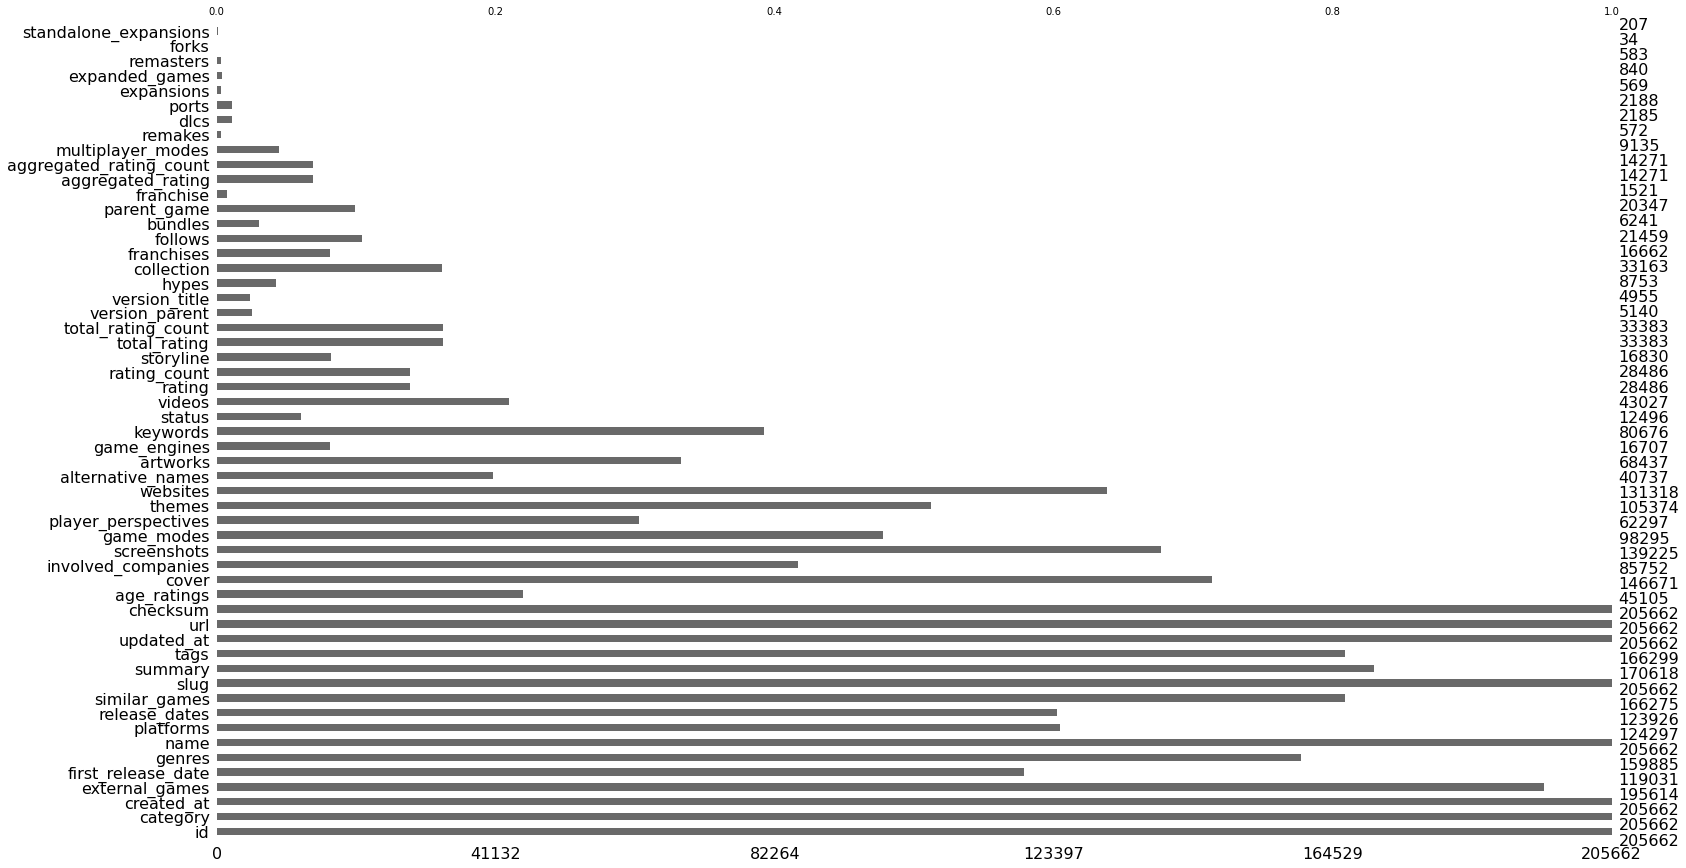

In [4]:
msno.bar(tables['game_library'])
tables['game_library'].shape

In [43]:
game_library, game_ratings, not_rated = prepare.wrangle_data()

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


In [ ]:
game_library.head()

In [ ]:
msno.bar(game_ratings)
game_ratings.shape

---

## Splitting the data 

### Why split?
- Splitting the data will prevent overftting when going into modeling
- Train wil be used in exploration



In [6]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.split(game_ratings, stratify_by='rating_bin')


---

# Explore



In [ ]:
#this will be seperating the dataframe to only games that are rated superb 
df_subperb_rating = train[train['rating_bin']== 'subperb']


In [ ]:
#lets not forget to remove duplicates 
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

In [ ]:
# This will be to seperate the dataframe to only games that are rated eaither (bad, very bad, awful)
df_low3_rating = train[(train['rating_bin']== 'bad') | (train['rating_bin']== 'very_bad') | (train['rating_bin']== 'awful')]



In [ ]:
# lets remember not to forget to remove the duplicates 
df_low3_rating = df_low3_rating.drop_duplicates(subset = "id")

## Question 1 - Do video games on certain platforms get superb user ratings?

In [ ]:
ex.platforms_bar()

#### Yes it looks like the most common superb rated game 
- Platform is PC 
- playstation 4 
- Xbox One 
- Nintendo Switch

### Question 1.1 These are the top 3 platforms for the lowest  ratings (bad, very bad , awful)?


In [ ]:
ex.platforms_low(df_low3_rating)

#### Not counting the "Not Avalible" because that is not a platform, 
#### The top 3 platforms are:
- PC
- MAC
- Nintendo Game Cube


## Question 2- What is the most common genre in games that are `subperb` (the highest rating)

In [ ]:
ex.genres_bar()

#### the most common platforms in superb rated games are `Indie`, `Adventure`, `Role-Playing-RPG`, `Shooter`

### Question 2.1 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?


In [ ]:
ex.genres_low(df_low3_rating)

#### The most common genres in the lowest rating are `Indie`, `Adventure`, `simulator`

## Question 3- what is the most common theme in games that are subperb (the highest rating)?

In [ ]:
ex.theme_bar()

#### The most common themes for games in superb are, `Action` , `Fantasy`, `Science-Fiction`, `Open-World`

### Question 3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

In [ ]:
ex.theme_low(df_low3_rating)

#### The most common game these in the lowest ratings `Action`, `Science fiction`, `Fantasy`

## Question 4 What Are the most common player perspectives in superb rated games?

In [ ]:
ex.player_bar()

#### The most common player-perspective in superb rated games are `Third-person`,`Birdview-Isometric`, `Side-View`, `First-Person`

## Question 4.1 What Are the most common player perspectives in lowest rated games?

In [ ]:
ex.player_low(df_low3_rating)

#### The most common player perspective in the lowest Rated Games are `Third-person`, `First-Person`, `Birdview-Isometric`

## Key Takeaways

The top features are for genre, themes, platforms and player perspective could lead to a successful creation of a profitable and high member rated Video Game


-----

# Modeling  

We built five classification models Random Forest, Decision Tree, K-nearest Neighbor all at various depths and a One vs. Rest classifier and  Logistic Regression model. They are all fitted to X_train

First drop columns not needed for modeling 

In [7]:
X_train = X_train.drop(columns=['name', 'first_release_date', 'slug', 'id', 'genres', 'platforms', 'player_perspectives', 'themes'])
X_validate = X_validate.drop(columns=['name', 'first_release_date', 'slug', 'id', 'genres', 'platforms', 'player_perspectives', 'themes'])
X_test = X_test.drop(columns=['name', 'first_release_date', 'slug', 'id', 'genres', 'platforms', 'player_perspectives', 'themes'])
X_train.head()

,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs
88164,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181410,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Random Forest
loop range for max depth of 1 through 30

In [8]:
modeling.RF_model(X_train, y_train, X_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.292360,0.290734,0.001626
1,2,0.305539,0.308728,-0.003189
2,3,0.311308,0.314395,-0.003087
3,4,0.320479,0.320346,0.000133
4,5,0.327584,0.326296,0.001288
5,6,0.336633,0.330122,0.006511
6,7,0.346289,0.334089,0.012200
7,8,0.361411,0.340606,0.020805
8,9,0.375926,0.346982,0.028944
9,10,0.394692,0.349391,0.045301


### Decision Tree
range of 30

In [9]:
modeling.DT_model(X_train, y_train, X_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.318596,0.333522,-0.014926
1,2,0.321450,0.333806,-0.012355
2,3,0.324244,0.329130,-0.004886
3,4,0.329224,0.332814,-0.003590
4,5,0.337362,0.339473,-0.002111
5,6,0.345075,0.341031,0.004043
6,7,0.353395,0.337631,0.015764
7,8,0.363598,0.339331,0.024266
8,9,0.372829,0.344432,0.028397
9,10,0.386129,0.343440,0.042689


### K-nearest neighbor
range of 30

In [10]:
modeling.KNN_model(X_train, y_train, X_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.539900,0.292151,0.247750
1,2,0.446678,0.292151,0.154527
2,3,0.436232,0.302777,0.133455
3,4,0.427426,0.301927,0.125499
4,5,0.414794,0.300368,0.114426
5,6,0.413458,0.308019,0.105439
6,7,0.412790,0.315245,0.097545
7,8,0.409146,0.314112,0.095034
8,9,0.409632,0.319354,0.090278
9,10,0.402223,0.324455,0.077768


### Logestic Regession

In [11]:
modeling.LR_model(X_train, y_train, X_validate, y_validate)

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.344528,0.342873,0.001655
1,2,0.344528,0.342873,0.001655


### One vs. Rest Classifier

On train set

In [12]:
modeling.ovr(X_train, y_train)

0.3441637313251549

On validate set

In [13]:
modeling.ovr_val(X_validate, y_validate)

0.3576083876452253

### Random Forest on test

- The best performing model was Random Forest with a max depth of 14 on validate. That will be the model used on test data.

In [26]:
modeling.RF_T(X_test, y_test, train)

,actual,baseline,RF
175884,alright,0.284647,0.546676
79502,alright,0.284647,0.546676
167888,alright,0.284647,0.546676
202304,good,0.284647,0.546676
104523,average,0.284647,0.546676
...,...,...,...
64267,good,0.284647,0.546676
148108,bad,0.284647,0.546676
163426,fair,0.284647,0.546676
168567,great,0.284647,0.546676


### Predictions on games without ratings 

We then used the best performing model on games that had not yet been rated. We were able to successfully predict the rating class for all unrated observations, including games that haven't been released yet, based on the features for those games.

- First make a copy of not_rated df. We will add the predictions to copy the copy that still contains the game names.
- Second, drop columns not needed for modeling


In [46]:
not_rated2 = not_rated.copy()
not_rated = not_rated.drop(columns=['rating_bin', 'name', 'first_release_date', 'slug', 'id', 'genres', 'platforms', 'player_perspectives', 'themes'])
not_rated.head()

,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
modeling.RF_pred(X_train, y_train, not_rated)

,name,id,Predicted_Rating
208257,Final Vendetta,191756,fair
208258,Blade Runner: Enhanced Edition,131847,alright
208259,Justice Sucks: Tactical Vacuum Action,138203,alright
208262,Murder Is Game Over,197110,good
208264,Sephonie,144724,alright


### Model Testing Results
  - All the models beat baseline on train, validate and test. We trained all of the models in two rounds; the first using Chi-Squared feature selection and the second without using it. All of the models preformed marginally better when trained with with all of the features we created in our dataset. Random Forest preformed the best on validate both with the feature selection and without. We ran it on the test data set and beat baseline with an accuracy of 0.388625

# Conclusion 

After acquiring, preparing and exploring the data from the IGDB API we were able to build five classification models that were trained on games with member ratings. All models were able to beat the baseline. 
We used the model with the highest accuracy, Random Forest, to predict ratings of games that have not yet been rated on IGDB, based on their features. Having this insight will greatly improve any video games that will be made in the future in regards to having a high user rating.

# Recomendations 

We recommend to stakeholders that some of the best and highest rated video games contain this combination of features:

`Genres` 
- Adventure
- role playing games

`Themes` 
- Fantasy 
- Action

`Platforms` 
- PC 
- Playstation 4

`Top perspectives` 
- Third
- Bird view /Isometric 